Notebook setup:

In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A3/A3_p1/src' #@param {type: "string"}
sys.path.append(path)

In [5]:
%matplotlib inline

Testing
---

In [58]:
from MazeMapData import *

In [59]:
mazeData

{'A': {'B': 'Advance'},
 'B': {'A': 'Left', 'F': 'Advance', 'C': 'Right'},
 'C': {'B': 'Advance'},
 'D': {'M': 'Advance', 'E': 'Right'},
 'E': {'D': 'Left', 'I': 'Advance', 'F': 'Right'},
 'F': {'G': 'Left', 'B': 'Advance', 'E': 'Right'},
 'G': {'F': 'Left', 'L': 'Advance', 'H': 'Right'},
 'H': {'G': 'Left', 'N': 'Advance'},
 'I': {'O': 'Left', 'J': 'Advance', 'E': 'Right'},
 'J': {'I': 'Advance'},
 'K': {'L': 'Advance'},
 'L': {'G': 'Left', 'K': 'Advance', 'Q': 'Right'},
 'M': {'D': 'Advance'},
 'N': {'H': 'Advance'},
 'O': {'T': 'Left', 'P': 'Advance', 'I': 'Right'},
 'P': {'O': 'Left', 'AD': 'Advance', 'Q': 'Right'},
 'Q': {'L': 'Left', 'P': 'Advance', 'W': 'Right'},
 'R': {'X': 'Advance'},
 'S': {'AA': 'Advance'},
 'T': {'Y': 'Left', 'U': 'Advance', 'O': 'Right'},
 'U': {'T': 'Left', 'AC': 'Advance'},
 'V': {'AE': 'Advance', 'W': 'Right'},
 'W': {'Q': 'Left', 'V': 'Advance', 'Z': 'Right'},
 'X': {'Y': 'Left', 'R': 'Advance'},
 'Y': {'T': 'Left', 'X': 'Advance'},
 'Z': {'AA': 'Advan

In [60]:
mazeLocations

{'A': (0, 0),
 'B': (7, 0),
 'C': (13, 0),
 'D': (1, 2),
 'E': (3, 2),
 'F': (7, 2),
 'G': (11, 2),
 'H': (13, 2),
 'I': (3, 4),
 'J': (6, 4),
 'K': (8, 4),
 'L': (11, 4),
 'M': (1, 5),
 'N': (13, 5),
 'O': (3, 6),
 'P': (7, 6),
 'Q': (11, 6),
 'R': (1, 7),
 'S': (13, 7),
 'T': (3, 8),
 'U': (5, 8),
 'V': (9, 8),
 'W': (11, 8),
 'X': (1, 10),
 'Y': (3, 10),
 'Z': (11, 10),
 'AA': (13, 10),
 'AB': (1, 12),
 'AC': (5, 12),
 'AD': (7, 12),
 'AE': (9, 12),
 'AF': (14, 12)}

In [61]:
from mazeMapClass import mazeMap

maze = mazeMap(mazeData,mazeLocations)
print(maze.get('A'))
print(maze.get('A','B'))
print(maze.get('A','C'))
print(maze.getLocation('B'))

maze.nodes()

{'B': 'Advance'}
Advance
None
(7, 0)


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'AA',
 'AB',
 'AC',
 'AD',
 'AE',
 'AF']

In [62]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [63]:
G = nx.Graph(maze.graph_dict)
#G.remove_node('Left')
#G.remove_node('Advance')
#G.remove_node('Right')
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF'))

In [64]:
nodes_colors = ['black' for node in maze.graph_dict.keys()]
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

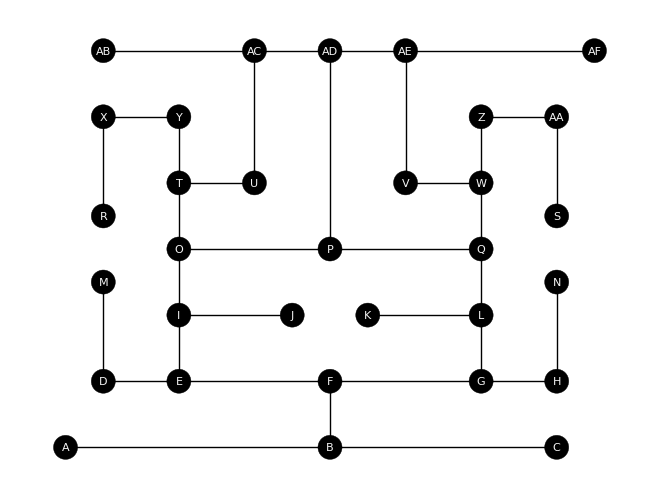

In [65]:
nx.draw(G, pos={k: maze.locations[k] for k in G.nodes()},
            node_color=nodes_colors, linewidths=0.3, edgecolors='k')
node_label_pos = { k:[v[0],v[1]]  for k,v in maze.locations.items() }
node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=8, font_color='whitesmoke')

Task 2
---

In [66]:
from mazeProblemClass import MazeProblem

#See makeDATA()
#See deliveryProblemSolvingAgentProClass.py in Task 3
#See vacuumProblemSolvingAgentShowClass.py

In [89]:
from mazeWorldData import *

In [90]:
makeData()

{'A': {'B': 'Advance'},
 'B': {'A': 'Left', 'F': 'Advance', 'C': 'Right'},
 'C': {'B': 'Advance'},
 'D': {'M': 'Advance', 'E': 'Right'},
 'E': {'D': 'Left', 'I': 'Advance', 'F': 'Right'},
 'F': {'G': 'Left', 'B': 'Advance', 'E': 'Right'},
 'G': {'F': 'Left', 'L': 'Advance', 'H': 'Right'},
 'H': {'G': 'Left', 'N': 'Advance'},
 'I': {'O': 'Left', 'J': 'Advance', 'E': 'Right'},
 'J': {'I': 'Advance'},
 'K': {'L': 'Advance'},
 'L': {'G': 'Left', 'K': 'Advance', 'Q': 'Right'},
 'M': {'D': 'Advance'},
 'N': {'H': 'Advance'},
 'O': {'T': 'Left', 'P': 'Advance', 'I': 'Right'},
 'P': {'O': 'Left', 'AD': 'Advance', 'Q': 'Right'},
 'Q': {'L': 'Left', 'P': 'Advance', 'W': 'Right'},
 'R': {'X': 'Advance'},
 'S': {'AA': 'Advance'},
 'T': {'Y': 'Left', 'U': 'Advance', 'O': 'Right'},
 'U': {'T': 'Left', 'AC': 'Advance'},
 'V': {'AE': 'Advance', 'W': 'Right'},
 'W': {'Q': 'Left', 'V': 'Advance', 'Z': 'Right'},
 'X': {'Y': 'Left', 'R': 'Advance'},
 'Y': {'T': 'Left', 'X': 'Advance'},
 'Z': {'AA': 'Advan

In [91]:
mazeStateLocations()

{'A': (0, 0),
 'B': (7, 0),
 'C': (13, 0),
 'D': (1, 2),
 'E': (3, 2),
 'F': (7, 2),
 'G': (11, 2),
 'H': (13, 2),
 'I': (3, 4),
 'J': (6, 4),
 'K': (8, 4),
 'L': (11, 4),
 'M': (1, 5),
 'N': (13, 5),
 'O': (3, 6),
 'P': (7, 6),
 'Q': (11, 6),
 'R': (1, 7),
 'S': (13, 7),
 'T': (3, 8),
 'U': (5, 8),
 'V': (9, 8),
 'W': (11, 8),
 'X': (1, 10),
 'Y': (3, 10),
 'Z': (11, 10),
 'AA': (13, 10),
 'AB': (1, 12),
 'AC': (5, 12),
 'AD': (7, 12),
 'AE': (9, 12),
 'AF': (14, 12)}

In [114]:
from mazeMapClass import mazeMap

mazeWorldGraph = mazeMap(makeData(), mazeStateLocations())

mazeWorldGraph.g

{'A': {'Advance': 1},
 'B': {'Left': 1, 'Advance': 1, 'Right': 1},
 'C': {'Advance': 1},
 'D': {'Advance': 1, 'Right': 1},
 'E': {'Left': 1, 'Advance': 1, 'Right': 1},
 'F': {'Left': 1, 'Advance': 1, 'Right': 1},
 'G': {'Left': 1, 'Advance': 1, 'Right': 1},
 'H': {'Left': 1, 'Advance': 1},
 'I': {'Left': 1, 'Advance': 1, 'Right': 1},
 'J': {'Advance': 1},
 'K': {'Advance': 1},
 'L': {'Left': 1, 'Advance': 1, 'Right': 1},
 'M': {'Advance': 1},
 'N': {'Advance': 1},
 'O': {'Left': 1, 'Advance': 1, 'Right': 1},
 'P': {'Left': 1, 'Advance': 1, 'Right': 1},
 'Q': {'Left': 1, 'Advance': 1, 'Right': 1},
 'R': {'Advance': 1},
 'S': {'Advance': 1},
 'T': {'Left': 1, 'Advance': 1, 'Right': 1},
 'U': {'Left': 1, 'Advance': 1},
 'V': {'Advance': 1, 'Right': 1},
 'W': {'Left': 1, 'Advance': 1, 'Right': 1},
 'X': {'Left': 1, 'Advance': 1},
 'Y': {'Left': 1, 'Advance': 1},
 'Z': {'Advance': 1, 'Right': 1},
 'AA': {'Advance': 1, 'Right': 1},
 'AB': {'Advance': 1},
 'AC': {'Left': 1, 'Advance': 1, 'Rig

In [113]:
mazeWorldGraph.nodes()

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'AA',
 'AB',
 'AC',
 'AD',
 'AE',
 'AF']

In [115]:
mazeWorldGraph.get('A')

{'B': 'Advance'}

In [116]:
mazeWorldGraph.getLocation('A')

(0, 0)

In [117]:
G = nx.Graph(mazeWorldGraph.g)

In [118]:
node_label_pos = { k:[v[0],v[1]]  for k,v in mazeWorldGraph.locations.items() }

In [119]:
node_label_pos

{'A': [0, 0],
 'B': [7, 0],
 'C': [13, 0],
 'D': [1, 2],
 'E': [3, 2],
 'F': [7, 2],
 'G': [11, 2],
 'H': [13, 2],
 'I': [3, 4],
 'J': [6, 4],
 'K': [8, 4],
 'L': [11, 4],
 'M': [1, 5],
 'N': [13, 5],
 'O': [3, 6],
 'P': [7, 6],
 'Q': [11, 6],
 'R': [1, 7],
 'S': [13, 7],
 'T': [3, 8],
 'U': [5, 8],
 'V': [9, 8],
 'W': [11, 8],
 'X': [1, 10],
 'Y': [3, 10],
 'Z': [11, 10],
 'AA': [13, 10],
 'AB': [1, 12],
 'AC': [5, 12],
 'AD': [7, 12],
 'AE': [9, 12],
 'AF': [14, 12]}

In [120]:
edge_weights = {(k, v2) : k2 for k, v in mazeWorldGraph.graph_dict.items() for k2, v2 in v.items()}#actions

In [121]:
edge_weights

{('A', 'Advance'): 'B',
 ('B', 'Left'): 'A',
 ('B', 'Advance'): 'F',
 ('B', 'Right'): 'C',
 ('C', 'Advance'): 'B',
 ('D', 'Advance'): 'M',
 ('D', 'Right'): 'E',
 ('E', 'Left'): 'D',
 ('E', 'Advance'): 'I',
 ('E', 'Right'): 'F',
 ('F', 'Left'): 'G',
 ('F', 'Advance'): 'B',
 ('F', 'Right'): 'E',
 ('G', 'Left'): 'F',
 ('G', 'Advance'): 'L',
 ('G', 'Right'): 'H',
 ('H', 'Left'): 'G',
 ('H', 'Advance'): 'N',
 ('I', 'Left'): 'O',
 ('I', 'Advance'): 'J',
 ('I', 'Right'): 'E',
 ('J', 'Advance'): 'I',
 ('K', 'Advance'): 'L',
 ('L', 'Left'): 'G',
 ('L', 'Advance'): 'K',
 ('L', 'Right'): 'Q',
 ('M', 'Advance'): 'D',
 ('N', 'Advance'): 'H',
 ('O', 'Left'): 'T',
 ('O', 'Advance'): 'P',
 ('O', 'Right'): 'I',
 ('P', 'Left'): 'O',
 ('P', 'Advance'): 'AD',
 ('P', 'Right'): 'Q',
 ('Q', 'Left'): 'L',
 ('Q', 'Advance'): 'P',
 ('Q', 'Right'): 'W',
 ('R', 'Advance'): 'X',
 ('S', 'Advance'): 'AA',
 ('T', 'Left'): 'Y',
 ('T', 'Advance'): 'U',
 ('T', 'Right'): 'O',
 ('U', 'Left'): 'T',
 ('U', 'Advance'): 'AC',

In [122]:
sorted(G)

['A',
 'AA',
 'AB',
 'AC',
 'AD',
 'AE',
 'AF',
 'Advance',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'Left',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'Right',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

KeyError: 'Advance'

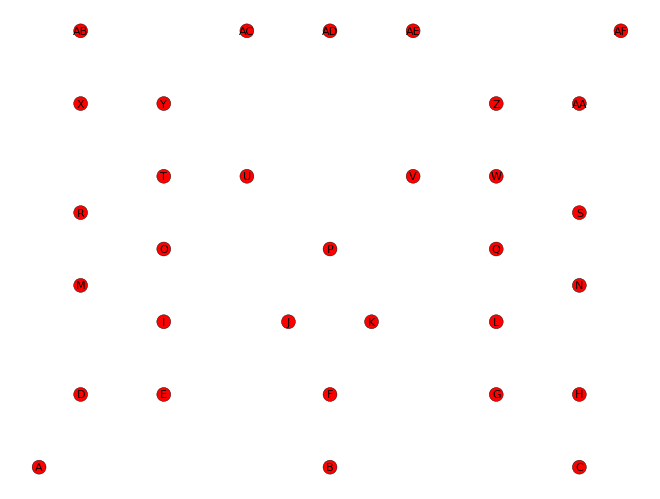

In [108]:
nx.draw(G, pos={k: mazeWorldGraph.locations[k] for k in G.nodes()},
            node_color=['red' for node in mazeWorldGraph.g.keys()],
            linewidths=0.3, edgecolors='k', node_size=100)
# draw labels for nodes
node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=8)
# add edge lables to the graph
nx.draw_networkx_edge_labels(G, pos=mazeWorldGraph.locations, edge_labels=edge_weights, font_size=8, font_color
='r')